**다변량 비시각화**
- 두개 이상의 변수로 구성된 데이터의 관계를 교차표 및 상관계수 등으로 파악하는 데이터 탐색 유형 
- 주어진 변수간의 관계를 수치 및 통계적 지표 기반으로 파악하는 것이 목적

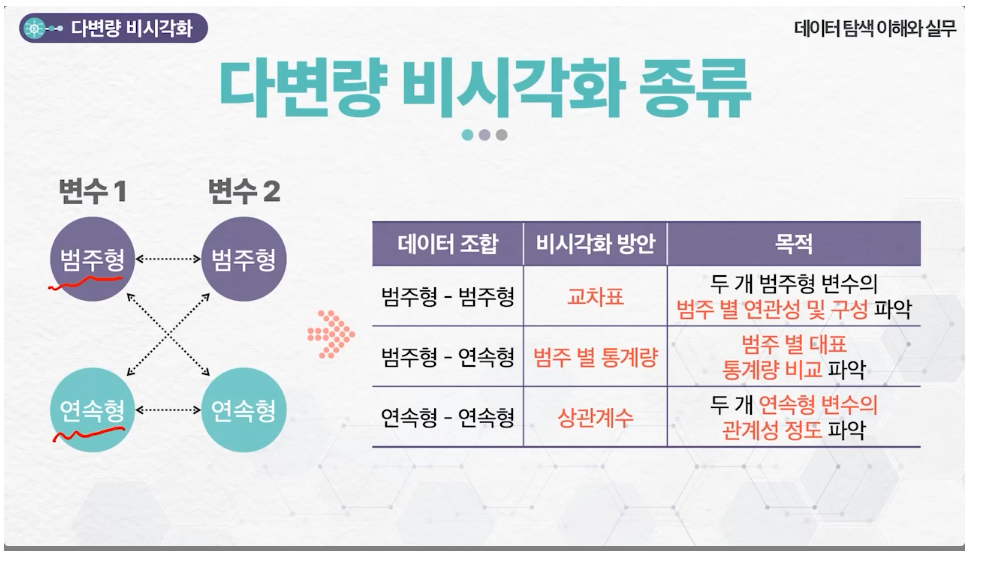


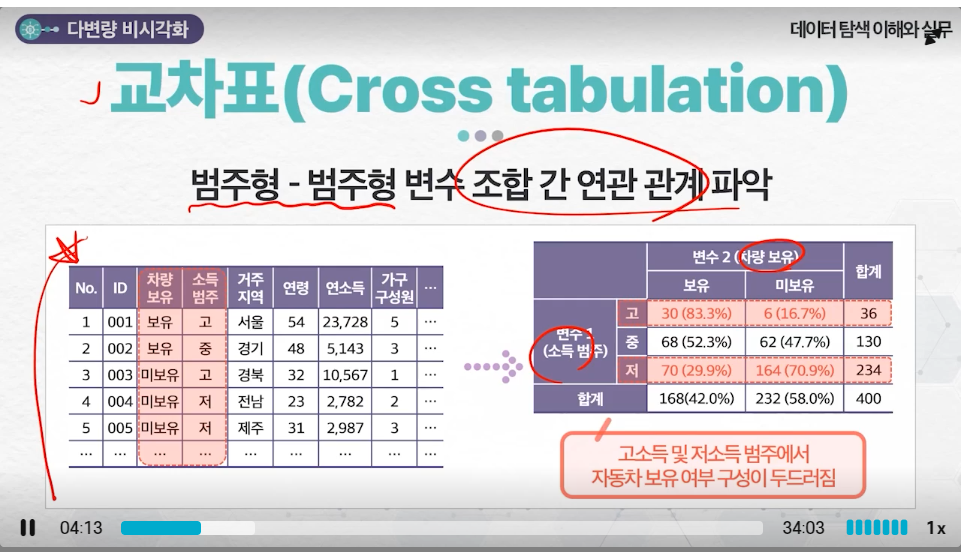

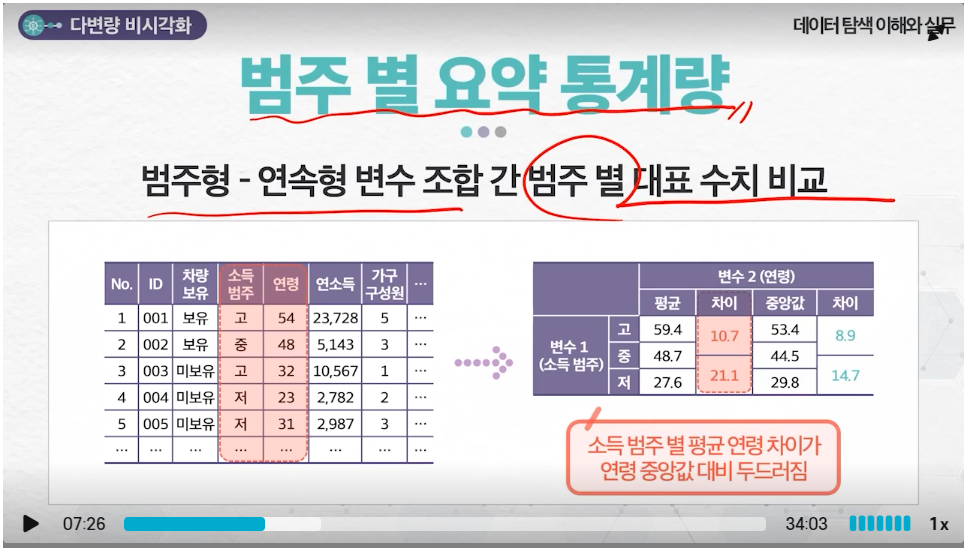

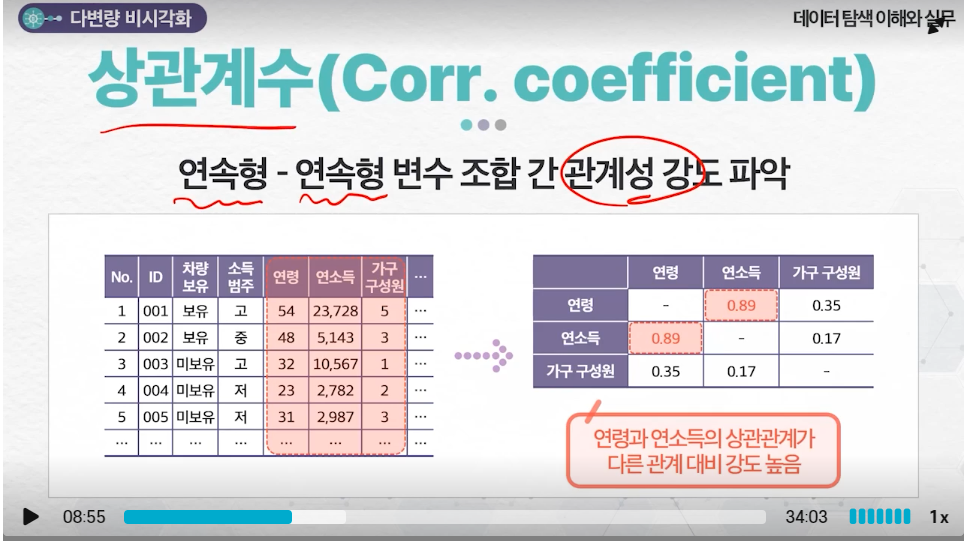

범주형- 범주형 다변량 비시각화 

 교차표(Cross Tabulation)
  - 범주형 - 범주형 변수 교차하여 파악함으로써 각 범주 조합 간의 구성을 도출
  - 조합 간의 구성을 통해 범주형 변수 간 관련성을 확인 
  

In [3]:
# 라이브러리 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
housing_data = pd.read_excel('D:/KTdata/boston.xls')
housing_data = pd.DataFrame(housing_data)
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [5]:
#데이터 설명에 따라 CHAS 컬럼을 범주형 데이터로 변환
housing_data = housing_data.astype({'CHAS':'object'})


In [6]:
#타겟변수인 주택가격 (MEDV) 범주화
#평균 가격 기반으로 고가, 저가 범주로 구분 
medv_bins = [0, np.mean(housing_data['MEDV']),np.max(housing_data['MEDV'])]
medv_names = ['cheap','expensive']
housing_data['MEDV_G'] = pd.cut(housing_data['MEDV'],medv_bins,labels=medv_names )
housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,MEDV_G
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,expensive
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,cheap
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,expensive
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,expensive
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,cheap
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,cheap
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,expensive
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,cheap


In [7]:
#주택 가격과 범주화된 독립변수 간 관계 확인
# 1) CHAS 변수와의 관계

rst_CHAS = pd.crosstab(housing_data['CHAS'], housing_data['MEDV_G'], margins=True)
rst_CHAS

MEDV_G,cheap,expensive,All
CHAS,,,
0,282,189,471
1,15,20,35
All,297,209,506


- 대부분의 타운이 강 경계에 위치하지 않음

In [8]:
#(INDUS) 범주화
# INDUS_LOW: 비소매 사업 지억 비율이 낮음 
# INDUS_HIGHT: 비소매 사업 지억 비율이 높음 
medv_bins = [0, np.mean(housing_data['INDUS']),np.max(housing_data['INDUS'])]
medv_names = ['INDUS_LOW','INDUS_HIGHT']
housing_data['INDUS_G'] = pd.cut(housing_data['INDUS'],medv_bins,labels=medv_names )
housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,MEDV_G,INDUS_G
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,expensive,INDUS_LOW
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,cheap,INDUS_LOW
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,expensive,INDUS_LOW
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,expensive,INDUS_LOW
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,expensive,INDUS_LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,cheap,INDUS_HIGHT
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,cheap,INDUS_HIGHT
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,expensive,INDUS_HIGHT
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,cheap,INDUS_HIGHT


In [11]:
#주택 가격과 범주화된 독립변수 간 관계 확인
# 1) INDUS 변수와의 관계

rst_INDUS = pd.crosstab(housing_data['INDUS_G'], housing_data['MEDV_G'], margins=True)
# 행별 범주 구성 비율 확인
# crosstab 에서 nomalize = 'index'로 행별로 비율 환산 가능
rst_INDUS['ratio_cheap']= np.round(rst_INDUS['cheap']/rst_INDUS['All']*100,2)
rst_INDUS['ratio_expansive']=np.round(rst_INDUS['expensive']/rst_INDUS['All']*100,2)
rst_INDUS

MEDV_G,cheap,expensive,All,ratio_cheap,ratio_expansive
INDUS_G,,,,,
INDUS_LOW,126,168,294,42.86,57.14
INDUS_HIGHT,171,41,212,80.66,19.34
All,297,209,506,58.70,41.30


- 비소매 사업지역 비율이 평균대비 높을 수록(INDUS_HIGHT) , 주택가격이 전체 평균대비 낮은 지역이 많음
- 비소매 사업지역 비율일 평균대비 낮을(INDUS_LOW) 경우 비등한 관계를 보임

In [14]:
#관측 범위를 평균을 기준으로 구간화
# RAD 범주화 
# RAD_LOW : 고속도로의 접근성 지수가 낮음
# RAD_HIGH: 고속도로의 접근성 지수가 높음

rad_bins = [0, np.mean(housing_data['RAD']),np.max(housing_data['RAD'])]
rad_names = ['RAD_LOW','RAD_HIGH']
housing_data['RAD_G'] = pd.cut(housing_data['RAD'],rad_bins,labels=rad_names )

#주택 가격과 범주화된 독립변수 간 관계 확인
# 1) RAD_G 변수와의 관계

rst_RAD = pd.crosstab(housing_data['RAD_G'], housing_data['MEDV_G'], margins=True)
# 행별 범주 구성 비율 확인
# crosstab 에서 nomalize = 'index'로 행별로 비율 환산 가능
rst_RAD['ratio_cheap']= np.round(rst_RAD['cheap']/rst_RAD['All']*100,2)
rst_RAD['ratio_expansive']=np.round(rst_RAD['expensive']/rst_RAD['All']*100,2)
rst_RAD

MEDV_G,cheap,expensive,All,ratio_cheap,ratio_expansive
RAD_G,,,,,
RAD_LOW,183,191,374,48.93,51.07
RAD_HIGH,114,18,132,86.36,13.64
All,297,209,506,58.70,41.30


- 방사형 고속도로까지 접근정 지수가 높은 경우(RAD_HIGH), 주택 가격이 전체 평균대비 낮은 지역이 많음 
- 방사형 고속도로까지 접근성 지수가 평균 대비 낮은 경우에는(RAD_LOW) 비등한 관계를 보임

In [16]:
# INDUS_G 및 RAD_G 를 교차하여 MEDV_G 구성 확인
#행별 범주 구성 비율 확인 
rst_df = pd.crosstab([housing_data['RAD_G'], housing_data['INDUS_G']],housing_data['MEDV_G'], margins=True)

rst_df['ratio_cheap']= np.round(rst_df['cheap']/rst_df['All']*100,2)
rst_df['ratio_expansive']=np.round(rst_df['expensive']/rst_df['All']*100,2)

rst_df

MEDV_G                cheap  expensive  All  ratio_cheap  ratio_expansive
RAD_G    INDUS_G                                                         
RAD_LOW  INDUS_LOW      126        168  294        42.86            57.14
         INDUS_HIGHT     57         23   80        71.25            28.75
RAD_HIGH INDUS_HIGHT    114         18  132        86.36            13.64
All                     297        209  506        58.70            41.30

- 기존 개별 변수 결과
    - INDUS_G 와 RAD_G가 모두 전체 평균대비 낮은 경우(LOW 레벨), 주택가격 범주 구분이 두드러지지 않음 
- 함께 교차하여 비교했을 시 개별 컬럼 별 비율 구성보다 조금 더 구분되어짐을 보임 
    - 고속도로 접근성 지수는 낮으나, 상업지역이 적은 경유 비교적 주택 가격이 평균대비 낮은 편
- 다만, INDUS_G 와 RAD_G 모두 LOW레벨일 때 전체 가격 범주 구분이 두드러지지 않음 
- 범주형으로 변환하여 분석에 활용할 경우, 좀더 세밀하게 범주 범위조정 필요

In [17]:
# 관측 범위를 동일한 길이로 구간화 
# 3) INDUS 변수 범주 범위 재조정 

#(INDUS) 범주화
# INDUS_LOW: 비소매 사업 지억 비율이 낮음 
# INDUS_HIGHT: 비소매 사업 지억 비율이 높음 
re_indus_bins = [0, 
                 np.max(housing_data['INDUS'])/4*1,
                 np.max(housing_data['INDUS'])/4*2,
                 np.max(housing_data['INDUS'])/4*3,
                 np.max(housing_data['INDUS'])]
re_indus_names = ['INDUS_G1','INDUS_G2','INDUS_G3','INDUS_G4']
housing_data['RE_INDUS_G'] = pd.cut(housing_data['INDUS'],re_indus_bins,labels=re_indus_names)



#주택 가격과 범주화된 독립변수 간 관계 확인
# 1) RE_INDUS_G 변수와의 관계
rst_RE_INDUS = pd.crosstab(housing_data['RE_INDUS_G'], housing_data['MEDV_G'], margins=True)

# 행별 범주 구성 비율 확인
# crosstab 에서 nomalize = 'index'로 행별로 비율 환산 가능
rst_RE_INDUS['ratio_cheap']= np.round(rst_RE_INDUS['cheap']/rst_RE_INDUS['All']*100,2)
rst_RE_INDUS['ratio_expansive']=np.round(rst_RE_INDUS['expensive']/rst_RE_INDUS['All']*100,2)
rst_RE_INDUS

MEDV_G,cheap,expensive,All,ratio_cheap,ratio_expansive
RE_INDUS_G,,,,,
INDUS_G1,56,139,195,28.72,71.28
INDUS_G2,79,31,110,71.82,28.18
INDUS_G3,136,38,174,78.16,21.84
INDUS_G4,26,1,27,96.30,3.70
All,297,209,506,58.70,41.30


- 비소매 사업지역 비율을 재조정한 독립변수(RE_INDUS_G) 와 주택가격 범주(MEDV_G) 관계
- 비소매 사업지역 비율 정도가 낮을수록 주택가격이 높은 현상을 보임 
- 구분이 확실히 두드러짐

In [18]:
# INDUS_G 및 RAD_G 를 교차하여 MEDV_G 구성 확인
#행별 범주 구성 비율 확인 
rst_df = pd.crosstab([housing_data['RAD_G'], housing_data['RE_INDUS_G']],housing_data['MEDV_G'], margins=True)

rst_df['ratio_cheap']= np.round(rst_df['cheap']/rst_df['All']*100,2)
rst_df['ratio_expansive']=np.round(rst_df['expensive']/rst_df['All']*100,2)

rst_df

MEDV_G               cheap  expensive  All  ratio_cheap  ratio_expansive
RAD_G    RE_INDUS_G                                                     
RAD_LOW  INDUS_G1       56        139  195        28.72            71.28
         INDUS_G2       79         31  110        71.82            28.18
         INDUS_G3       22         20   42        52.38            47.62
         INDUS_G4       26          1   27        96.30             3.70
RAD_HIGH INDUS_G3      114         18  132        86.36            13.64
All                    297        209  506        58.70            41.30

범주형 - 연속형 다변량 비시각화 

범주별 요약 통계
 - 번주형-연속형 변수 교차하여 파악함으로써 각 범주 조합간의 대표 수치 도출
 - 대표적 수치 도출을 통해 범주간 차이 확인 
 


In [19]:
# 주택가격 범주 별 INDUS 변수 집계(평균 할용)
pd.DataFrame(housing_data.groupby(['MEDV_G'])['INDUS'].mean())

C:\Users\Yang\AppData\Local\Temp\ipykernel_20104\2697059567.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(housing_data.groupby(['MEDV_G'])['INDUS'].mean())


,INDUS
MEDV_G,
cheap,13.813266
expensive,7.333349


In [20]:
# 주택가격 범주 별 INDUS 변수 집계(중앙값 할용)
pd.DataFrame(housing_data.groupby(['MEDV_G'])['INDUS'].median())

C:\Users\Yang\AppData\Local\Temp\ipykernel_20104\3019690007.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(housing_data.groupby(['MEDV_G'])['INDUS'].median())


,INDUS
MEDV_G,
cheap,18.10
expensive,5.86


In [22]:
# 주택가격 범주 별 AGE 변수 집계(평균 할용)
pd.DataFrame(housing_data.groupby(['MEDV_G'])['AGE'].mean())

C:\Users\Yang\AppData\Local\Temp\ipykernel_20104\2856089864.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(housing_data.groupby(['MEDV_G'])['AGE'].mean())


,AGE
MEDV_G,
cheap,79.009764
expensive,53.746411


In [21]:
# 주택가격 범주 별 AGE 변수 집계(평균 할용)
pd.DataFrame(housing_data.groupby(['MEDV_G'])['AGE'].median())

C:\Users\Yang\AppData\Local\Temp\ipykernel_20104\1298325931.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(housing_data.groupby(['MEDV_G'])['AGE'].median())


,AGE
MEDV_G,
cheap,88.6
expensive,52.6


-  중앙값을 지표로 사용했을때 더 차이가 극명하게 생김
- 현업에서 모델 학습의 성능을 끌어올리기 위해 구분이 확실한 데이터를 생성할 필요가 있음 

연속형 - 연속형 다변량 비시각화 

상관관계
- 연속형- 연속형 변수의 상관분석을 통해 관계성 정도를 파악
- 상관계수를 기반으로 연속형 변수 간의 밀접성 파악

- 상관계수 도출 방안
    - 한 컬럼과 다른 모든 컬럼들의 Correlation (corrwith)
    - 모든 컬럼간의 Correlation (Corr)

In [28]:
housing_data = pd.read_excel('D:/KTdata/boston.xls')
housing_data = pd.DataFrame(housing_data)

housing_data_copy = housing_data.copy()
#데이터 설명에 따라 CHAS 컬럼을 범주형 데이터로 변환
housing_data_copy = housing_data_copy.astype({'CHAS':'object'})

In [29]:
# 주택 가격과 독립변수 간의 상관관계 확인 : Person 상관계수
np.round(housing_data_copy.corrwith(housing_data_copy['MEDV']),2).sort_values()

LSTAT       -0.74
PTRATIO     -0.51
INDUS       -0.48
TAX         -0.47
NOX         -0.43
CRIM        -0.39
AGE         -0.38
RAD         -0.38
CHAS         0.18
DIS          0.25
B            0.33
ZN           0.36
RM           0.70
CAT. MEDV    0.79
MEDV         1.00
dtype: float64

In [30]:
# 모든 컬럼 간 상관관계 도출
np.round(housing_data_copy.corr(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47,-0.27


In [31]:
# 상관게수 유의성 검정
import scipy.stats as stats
stats.pearsonr(housing_data_copy.TAX,housing_data_copy.RAD )
# 

PearsonRResult(statistic=0.9102281885331859, pvalue=4.1299201194141895e-195)

매우 강한 상관관계 ( TAX 와 RAD )가 있기에 다중공선성이 있다고 판단된다 